# Лабораторная работа №1. Python и визуалилизация данных#
#### Заполните код в клетках (где написано "Ваш код здесь")

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

Считайте данные из файла titanic_train.csv в память в виде объекта Pandas.DataFrame

In [3]:
#ваш код здесь
df = pd.read_csv("titanic_train.csv", sep=",", decimal=".")
df
        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
counts = df["Sex"].value_counts()
male = counts.get("male", 0)
female = counts.get("female", 0)
print(f"Male: {male}\nFemale: {female}")

Male: 577
Female: 314


##### 1. Сколько мужчин / женщин находилось на борту? 

Напишите код и правильный вариант ответа

1) 412 мужчин и 479 женщин

2) 314 мужчин и 577 женщин

3) 479 мужчин и 412 женщин

4) <font color="#ff0000"> 577 мужчин и 314 женщин </font>

#####  2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

Напишите код и правильный вариант ответа

1) 104

2) <font color="#ff0000"> 108 </font>

3) 112

4) 125

In [6]:
classes = df['Pclass'].value_counts()
classes

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
#ваш код здесь
classes = df.groupby(['Pclass', 'Sex']).size().unstack()
classes

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


#####  3. Каковы медиана и стандартное отклонение платежей (Fare)? 

Напишите код и правильный вариант ответа

1) <font color="red"> Медиана – 14.45, стандартное отклонение – 49.69 </font>

2) Медиана – 15.1, стандартное отклонение – 12.15

3) Медиана – 13.15, стандартное отклонение – 35.3

4) Медиана – 17.43, стандартное отклонение – 39.1

In [8]:
#ваш код здесь
fare = df["Fare"]
print(f"Медиана: {fare.median()}\nОтклонение: {fare.std()}")

Медиана: 14.4542
Отклонение: 49.6934285971809



##### 4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 22.7% среди молодых и 40.6% среди старых

2) <font color="red">40.6% среди молодых и 22.7% среди старых</font>

3) 35.3% среди молодых и 27.4% среди старых

4) 27.4% среди молодых и 35.3% среди старых

In [5]:
#ваш код здесь
over_60_survived = df[(df['Survived'] == 1) & (df['Age'] > 60)].shape[0]
under_30_survived = df[(df['Survived'] == 1) & (df['Age'] < 30)].shape[0]
under_30_total = df[df['Age'] < 30].shape[0]
over_60_total = df[df['Age'] > 60].shape[0]

percent_60 = over_60_survived / over_60_total * 100
percent_30 = under_30_survived / under_30_total * 100

print(f"Молодые: {percent_30}\nСтарые: {percent_60}")

Молодые: 40.625
Старые: 22.727272727272727


##### 5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 30.2% среди мужчин и 46.2% среди женщин

2) 35.7% среди мужчин и 74.2% среди женщин

3) 21.1% среди мужчин и 46.2% среди женщин

4) <font color="red">18.9% среди мужчин и 74.2% среди женщин</font>


In [6]:
#ваш код здесь
female_survived = df[(df['Survived'] == 1) & (df['Sex'] == "female")].shape[0]
male_survived = df[(df['Survived'] == 1) & (df['Sex'] == "male")].shape[0]
counts = df["Sex"].value_counts()
male = counts.get("male", 0)
female = counts.get("female", 0)

female_percent = female_survived / female * 100
male_percent = male_survived / male * 100

print(f"Женщины: {female_percent}\nМужчины: {male_percent}")

Женщины: 74.20382165605095
Мужчины: 18.890814558058924


##### 6. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Напишите код и правильный вариант ответа

1) Да

2) Нет


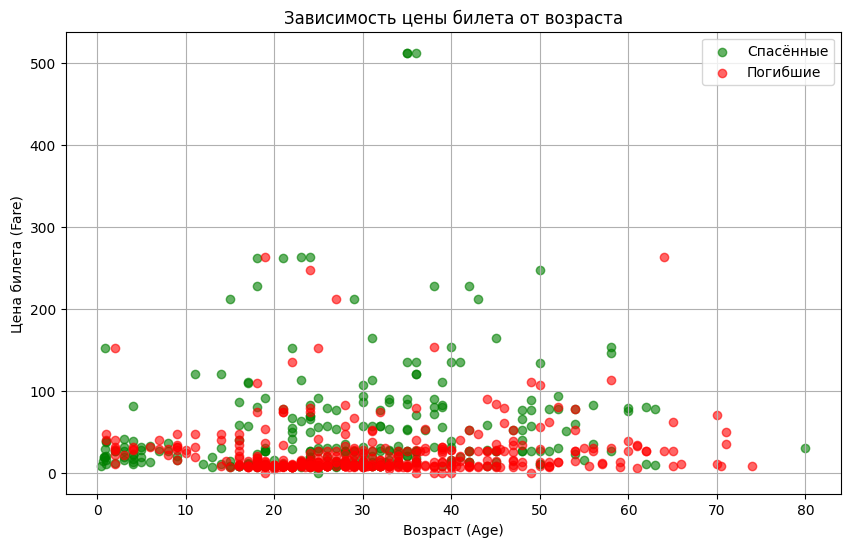

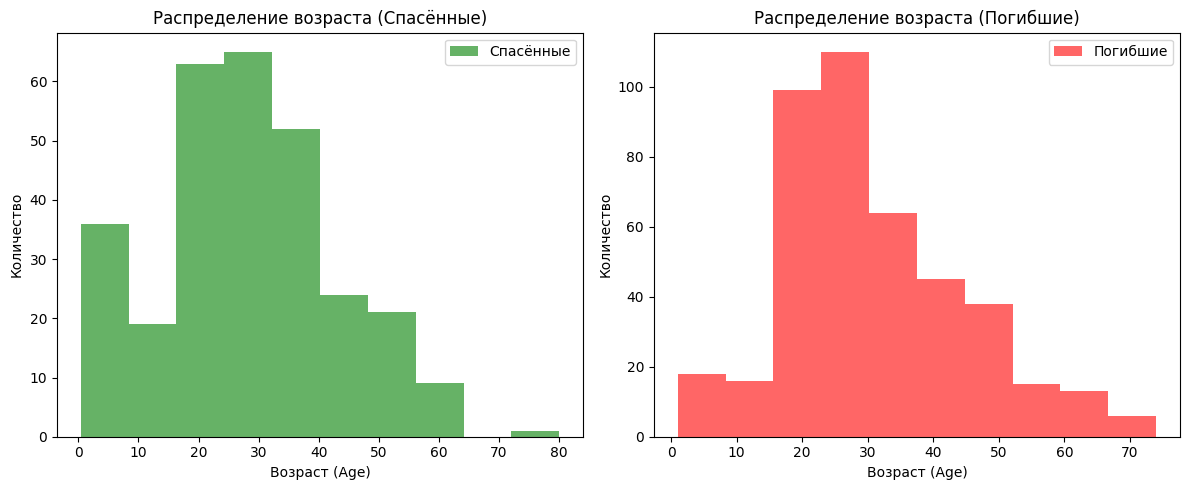

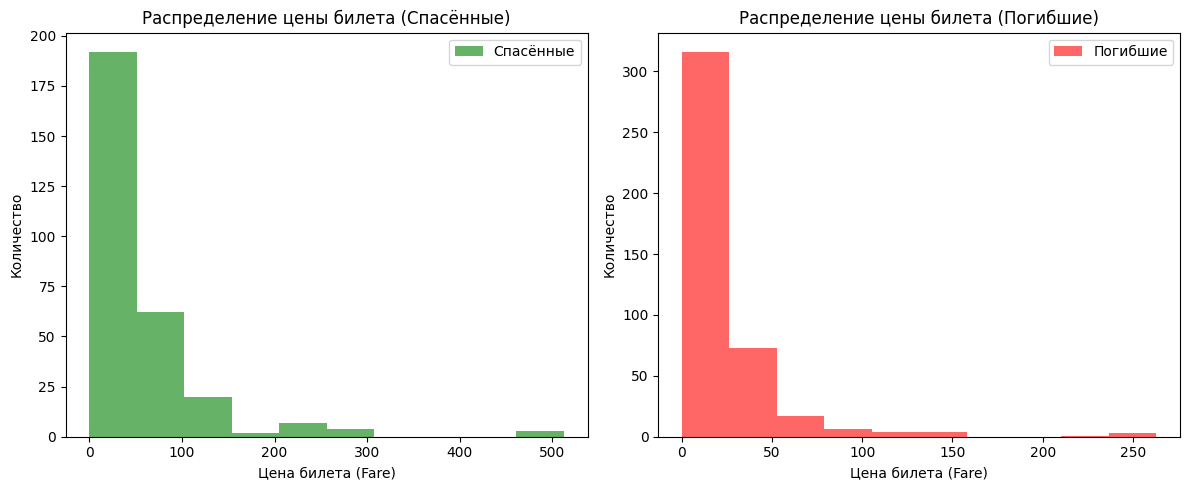

In [17]:
#ваш код здесь
import matplotlib.pyplot as plt

# Фильтрация данных, где Ticket и Age не пустые
valid_data = df[df['Ticket'].notnull() & df['Age'].notnull()]

# Создаем возрастные категории в valid_data
age_bins = [0, 20, 40, 60]
age_labels = ['0-20', '20-40', '40-60']
valid_data = valid_data.copy()  # Создаем копию, чтобы избежать SettingWithCopyWarning
valid_data['AgeGroup'] = pd.cut(valid_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Разделение на спасённых и погибших
survived = valid_data[valid_data['Survived'] == 1]
not_survived = valid_data[valid_data['Survived'] == 0]

# График 1: Точечный график (Fare vs Age)
plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], color='green', label='Спасённые', alpha=0.6)
plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', label='Погибшие', alpha=0.6)
plt.title('Зависимость цены билета от возраста')
plt.xlabel('Возраст (Age)')
plt.ylabel('Цена билета (Fare)')
plt.legend()
plt.grid(True)
plt.show()

# График 2: Гистограммы распределения возраста
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(survived['Age'], bins=10, color='green', alpha=0.6, label='Спасённые')
plt.title('Распределение возраста (Спасённые)')
plt.xlabel('Возраст (Age)')
plt.ylabel('Количество')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_survived['Age'], bins=10, color='red', alpha=0.6, label='Погибшие')
plt.title('Распределение возраста (Погибшие)')
plt.xlabel('Возраст (Age)')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.show()

# График 3: Гистограммы распределения цены билета
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(survived['Fare'], bins=10, color='green', alpha=0.6, label='Спасённые')
plt.title('Распределение цены билета (Спасённые)')
plt.xlabel('Цена билета (Fare)')
plt.ylabel('Количество')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_survived['Fare'], bins=10, color='red', alpha=0.6, label='Погибшие')
plt.title('Распределение цены билета (Погибшие)')
plt.xlabel('Цена билета (Fare)')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.show()




##### 7. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

Напишите код и правильный вариант ответа

1) В среднем мужчины 1-го класса старше 40 лет <font color="red">Да</font>

2) В среднем женщины 1-го класса старше 40 лет

3) Мужчины всех классов в среднем старше женщин того же класса <font color="red">Да</font>

4) В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса <font color="red">Да</font>

In [8]:
#ваш код здесь
female1 = df[(df['Sex']=="female") & (df['Pclass']==1)]
female2 = df[(df['Sex']=="female") & (df['Pclass']==2)]
female3 = df[(df['Sex']=="female") & (df['Pclass']==3)]

male1 = df[(df['Sex']=="male") & (df['Pclass']==1)]
male2 = df[(df['Sex']=="male") & (df['Pclass']==2)]
male3 = df[(df['Sex']=="male") & (df['Pclass']==3)]

female1_average = female1["Age"].mean()
female2_average = female2["Age"].mean()
female3_average = female3["Age"].mean()

male1_average = male1["Age"].mean()
male2_average = male2["Age"].mean()
male3_average = male3["Age"].mean()
female = f"1: {female1_average}\n2: {female2_average}\n3: {female3_average}"
male = f"1: {male1_average}\n2: {male2_average}\n3: {male3_average}"
print(f"Женщины:\n{female}\n\nМужчины:\n{male}")

Женщины:
1: 34.61176470588235
2: 28.722972972972972
3: 21.75

Мужчины:
1: 41.28138613861386
2: 30.74070707070707
3: 26.507588932806325


##### 8. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).

Напишите код и визуализируйте

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Sex', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Embarked', ylabel='Age'>,
        <Axes: xlabel='Survived', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Sex', ylabel='Fare'>,
        <Axes: xlabel='SibSp', ylabel='Fare'>,
        <Axes: xlabel='Parch', ylabel='Fare'>,
        <Axes: xlabel='Embarked', ylabel='Fare'>,
        <Axes: xlabel='Survived', ylabel='Fare'>],
       [<Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Sex', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <

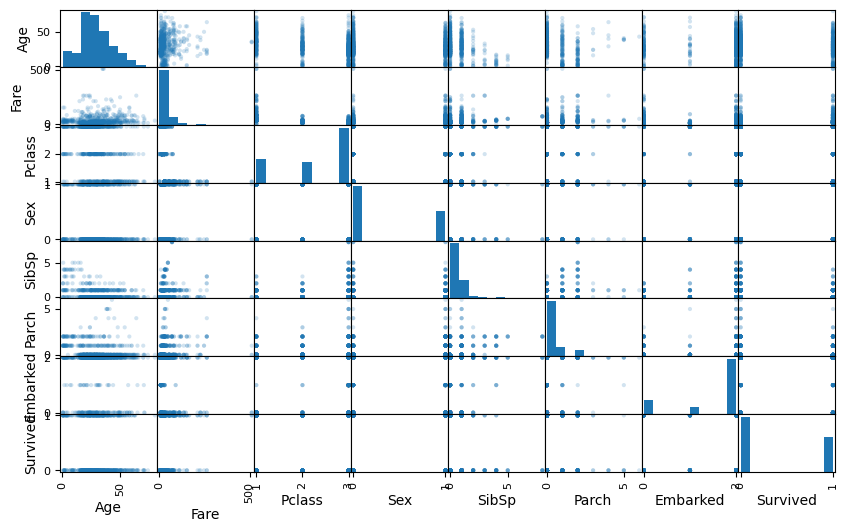

In [11]:
#ваш код здесь
df['Sex'] = df['Sex'].replace('male', '0')
df['Sex'] = df['Sex'].replace('female', '1')
df['Sex'] = pd.to_numeric(df['Sex'])

df['Embarked'] = df['Embarked'].replace('C', '0')
df['Embarked'] = df['Embarked'].replace('Q', '1')
df['Embarked'] = df['Embarked'].replace('S', '2')
df['Embarked'] = pd.to_numeric(df['Embarked'])
data = pd.DataFrame([df["Age"], df['Fare'], df["Pclass"], df['Sex'], df['SibSp'], df['Parch'], df['Embarked'], df['Survived']]).transpose()
data
pd.plotting.scatter_matrix(data,alpha=0.2, figsize=(10, 6))

##### 9. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

Напишите код и визуализируйте

<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

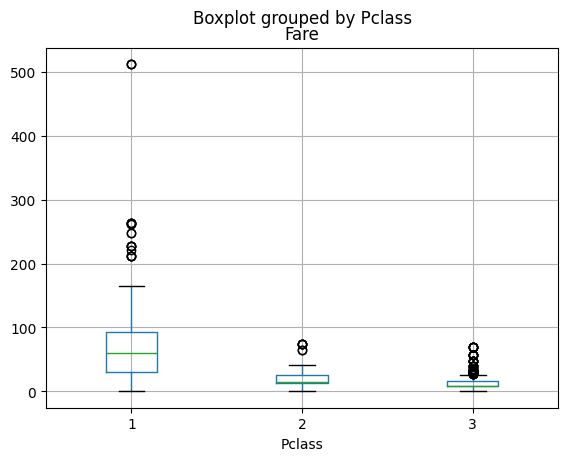

In [10]:
#ваш код здесь
boxplot = df.boxplot(column=['Fare'], by="Pclass")
boxplot

##### 10. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

<Axes: xlabel='Sex', ylabel='count'>

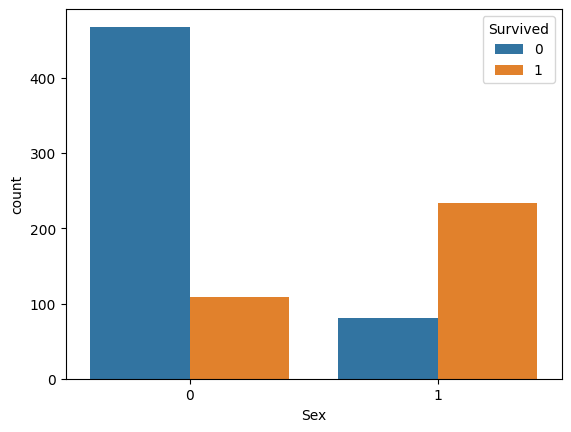

In [19]:
#ваш код здесь
import seaborn as sns

sns.countplot(data=df, x='Sex', hue='Survived')

##### 11. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

<Axes: xlabel='Pclass', ylabel='count'>

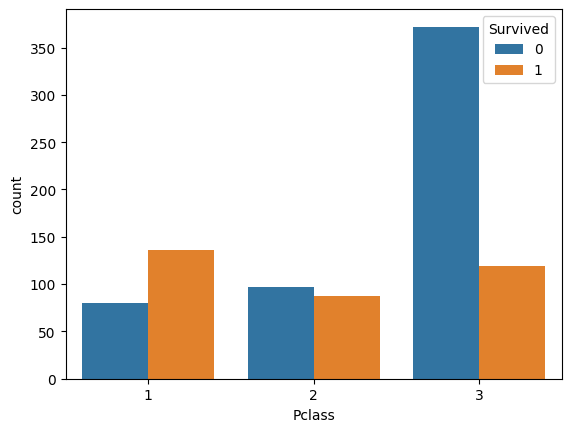

In [12]:
#ваш код здесь
sns.countplot(df, x="Pclass", hue="Survived")

##### 12. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

Напишите код и визуализируйте

C:\Users\hoaki\AppData\Local\Temp\ipykernel_38116\910497773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_filtered['AgeCategory'] = pd.cut(


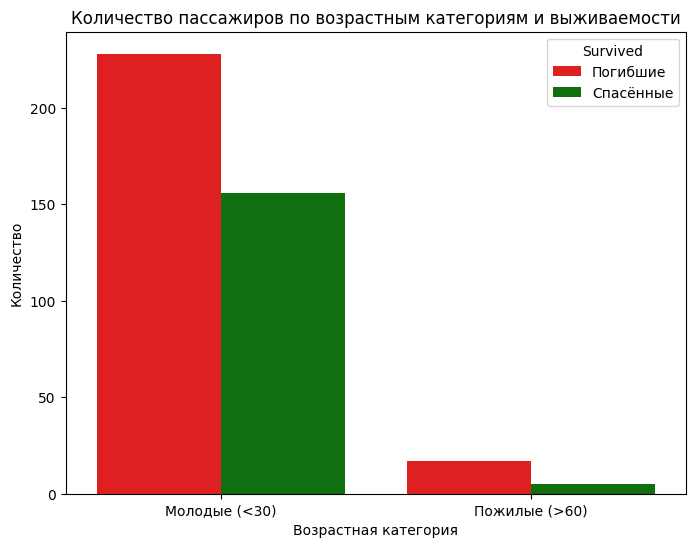

In [23]:
#ваш код здесь
# Создаем категорию возраста: молодые (<30) и пожилые (>60)
valid_data_filtered = df[(df['Age'].notna()) & ((df['Age'] < 30) | (df['Age'] > 60))]

# Categorize the filtered data
valid_data_filtered['AgeCategory'] = pd.cut(
    valid_data_filtered['Age'],
    bins=[0, 30, float('inf')],
    labels=['Молодые (<30)', 'Пожилые (>60)'],
    right=False
)

plt.figure(figsize=(8, 6))
sns.countplot(data=valid_data_filtered, x='AgeCategory', hue='Survived', palette={0: 'red', 1: 'green'})
plt.title('Количество пассажиров по возрастным категориям и выживаемости')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество')
plt.legend(title='Survived', labels=['Погибшие', 'Спасённые'])
plt.show()